# 1. Importing all dependencies and packages

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pathlib
import glob
import os
import random
import cv2

from tensorflow.keras.layers import Dense,Flatten , Conv2D , MaxPooling2D , Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
dataset = r'C:\Users\besho\Downloads\Cars\dataset\DATA'

# 2. Visualising and preparing data

In [4]:
path = 'number_of_samples.csv'

In [5]:
df = pd.read_csv(path)
df

,Unnamed: 0,Name of class,Number of files
0,0,bmw serie 1,82
1,1,chevrolet spark,108
2,2,chevroulet aveo,129
3,3,clio,344
4,4,duster,280
5,5,Golf,160
6,6,hyundai i10,130
7,7,hyundai tucson,128
8,8,logan,112
9,9,megane,280


<Axes: xlabel='Number of files', ylabel='Name of class'>

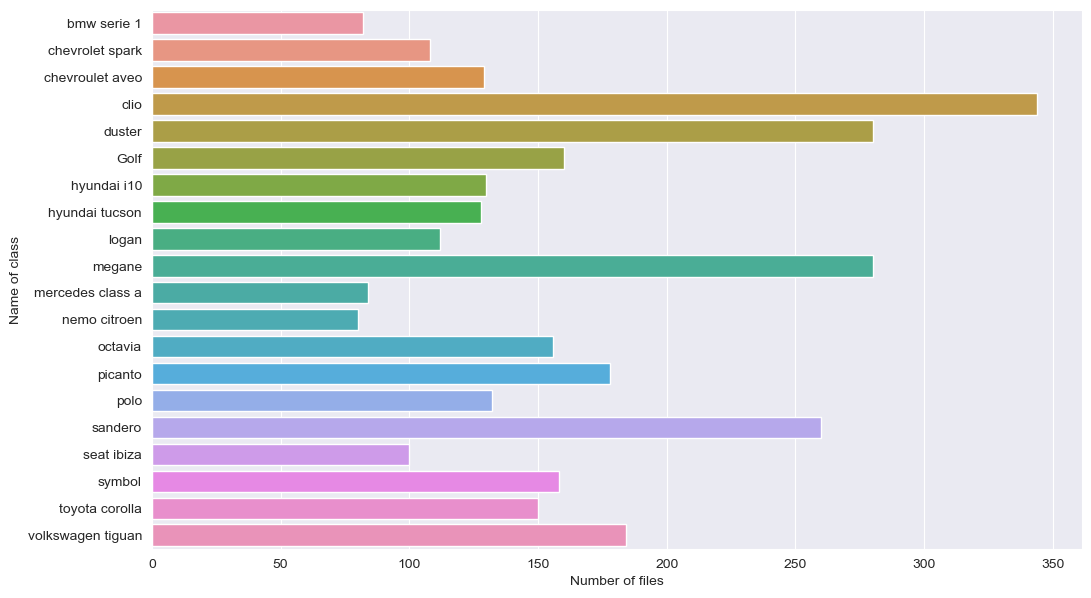

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))
sns.barplot(x=df['Number of files'],y=df['Name of class'])

<AxesSubplot:xlabel='Number of files', ylabel='Name of class'>

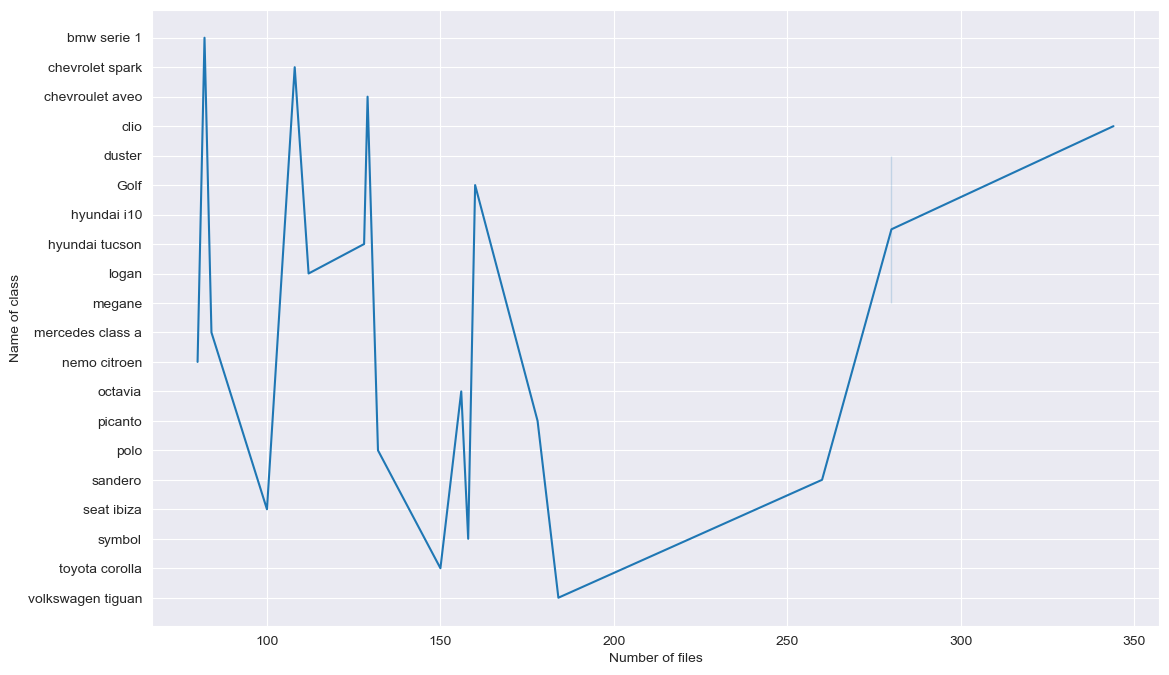

In [19]:
plt.figure(figsize=(13,8))
sns.lineplot(x=df['Number of files'],y=df['Name of class'])

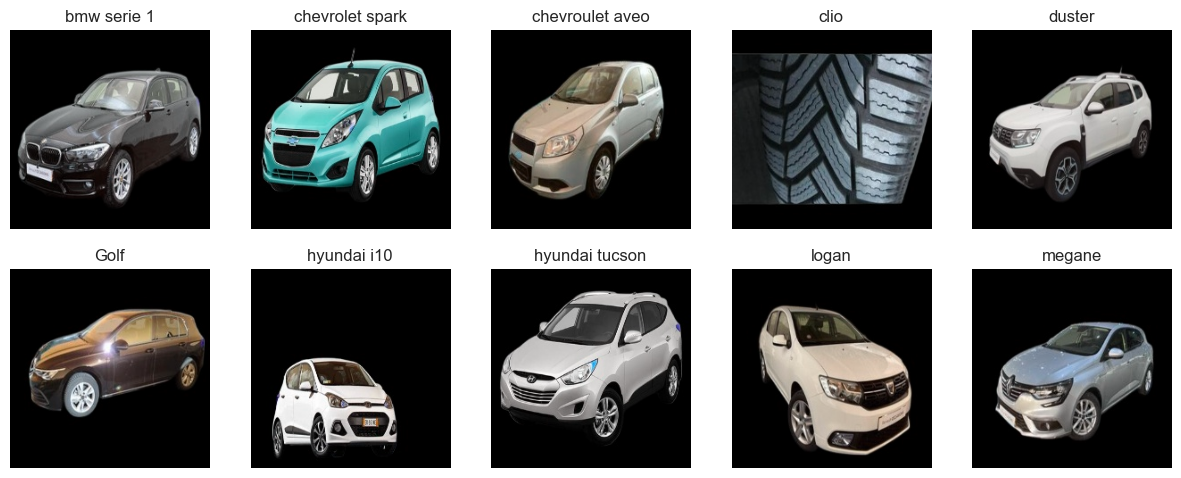

In [20]:
data = os.listdir(dataset)                                        # to get name of each directory

plt.figure(figsize=(15, 15))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    j = random.randrange(1, 30)                                    # generate random sample to visualise
    current_dir = os.listdir(dataset+'/'+str(data[i]))             # get all files in current directory
    img = cv2.imread(dataset+'/'+str(data[i])+'/'+current_dir[j])  # reading the image path
    plt.imshow(img )                                               # path of file we want to visualise
    plt.title(data[i])                                             # title of class
    plt.axis("off")

plt.show()

now we start preparing our data

In [21]:
# Load training and validation sets
train_ds = image_dataset_from_directory(
    dataset,validation_split=0.2,
    subset='training',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
valid_ds = image_dataset_from_directory(
    dataset,validation_split=0.2,
    subset='validation',
    labels='inferred',
    label_mode='categorical',
    image_size=[224, 224],
    seed=123,
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    train_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    valid_ds
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 3235 files belonging to 20 classes.
Using 2588 files for training.
Found 3235 files belonging to 20 classes.
Using 647 files for validation.


data is ready.

# 3. Model preparation and training

In [22]:
model = Sequential() 
model.add(Rescaling(1./255 ,input_shape=(224,224,3)))
model.add(Conv2D(16, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(20 , activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam' , metrics=['accuracy'])

In [24]:
# Set callback functions to early stop training 
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]
hist = model.fit(train_ds,validation_data=valid_ds, epochs=50 , callbacks=mycallbacks )

Epoch 1/50
41/41 [==============================] - 39s 915ms/step - loss: 2.9437 - accuracy: 0.1140 - val_loss: 2.8457 - val_accuracy: 0.0139
Epoch 2/50
41/41 [==============================] - 37s 898ms/step - loss: 2.4196 - accuracy: 0.2747 - val_loss: 1.9553 - val_accuracy: 0.4281
Epoch 3/50
41/41 [==============================] - 38s 912ms/step - loss: 1.3455 - accuracy: 0.6179 - val_loss: 0.8196 - val_accuracy: 0.7635
Epoch 4/50
41/41 [==============================] - 40s 966ms/step - loss: 0.5000 - accuracy: 0.8574 - val_loss: 0.3249 - val_accuracy: 0.9119
Epoch 5/50
41/41 [==============================] - 40s 964ms/step - loss: 0.1457 - accuracy: 0.9645 - val_loss: 0.4843 - val_accuracy: 0.8733
Epoch 6/50
41/41 [==============================] - 38s 927ms/step - loss: 0.0605 - accuracy: 0.9842 - val_loss: 0.1991 - val_accuracy: 0.9536
Epoch 7/50
41/41 [==============================] - 38s 929ms/step - loss: 0.0351 - accuracy: 0.9915 - val_loss: 0.2010 - val_accuracy: 0.9474

# 4. Evaluation and Results

In [25]:
model.evaluate(valid_ds)

11/11 [==============================] - 2s 190ms/step - loss: 0.1991 - accuracy: 0.9536


[0.19905239343643188, 0.9536321759223938]

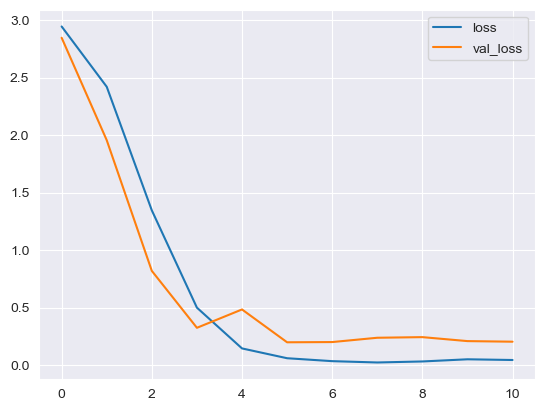

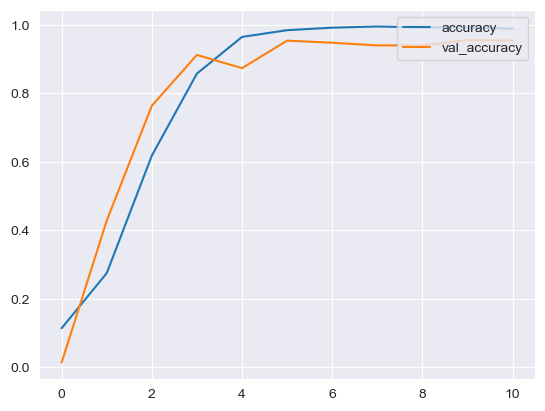

In [26]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()